We only need the first 2
[[15.2206992  -6.28764661  0.69589741 -4.66116169 -2.15769553]
 [ 7.64862617 -6.1508611   2.41206408 -4.79175356  2.28107   ]
 [10.06956981 12.71579601  3.12483873  2.92705651  1.95903111]
 ...
 [13.94501983 -4.57651213  1.33524951 -2.22267348 -3.87231338]
 [ 1.51420595 -0.44318638 -9.67441658  8.98012417 -3.13912697]
 [11.7556062  13.10353981  1.11248702  1.42439889  3.49819348]]
Centre of Force Gravity: [7.105427357601002e-18, 2.2737367544323206e-16]
21.52531924007612
Finally:
0.1495370396747527
[-0.14618599 -0.0314799 ]
We believe Baby Yoda to be at: [-0.14618599 -0.0314799 ]


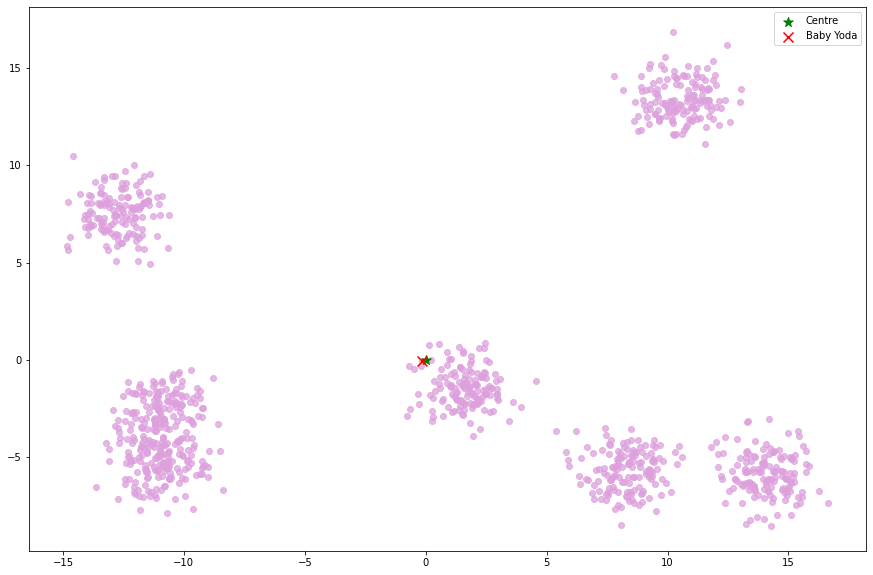

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fig = plt.figure(figsize=(15, 10))
scaler = StandardScaler()
pca = PCA(n_components = 5)

planet_df = pd.read_csv("planet.csv")
#planet_df.columns
points = planet_df.values
scaled = scaler.fit_transform(points)
pca.fit_transform(points)
new_data = pca.fit_transform(points)


# print("Principal Components:")
# print(pca.components_)
# How much info are in our PCs
#print(np.cumsum(pca.explained_variance_ratio_))


print("We only need the first 2")
# I think these are the "Force concentrations?"
#plt.scatter(pca.components_[0],pca.components_[1], s=250)
xs = new_data[:,0]
ys = new_data[:,1]
locations = np.array([xs,ys])
plt.scatter(xs,ys, alpha=0.75, color="plum")

force_spots = new_data
print(force_spots)
force_x_centre = force_spots[:,0].mean()
force_y_centre = force_spots[:,1].mean()
yoda_core = [force_x_centre, force_y_centre]
plt.scatter(force_x_centre, force_y_centre, marker="*", color="green", s=100, label="Centre")

print("Centre of Force Gravity: {}".format(yoda_core))


locations = locations.transpose()
guess = locations[0,0]
best_guess = guess
smallest_distance = np.linalg.norm(yoda_core - guess)
print(smallest_distance)
for place in locations:
    guess = place
    guess_distance = np.linalg.norm(yoda_core - guess)


    if guess_distance < smallest_distance:
        smallest_distance = guess_distance
        best_guess = guess
        #print("That's a better guess")
    else:
        pass


print("Finally:")
print(smallest_distance)
print(best_guess)

print("We believe Baby Yoda to be at: {}".format(best_guess))
plt.scatter(best_guess[0],best_guess[1], marker="x", s=100, color="red", label="Baby Yoda"), 
plt.legend()
